In [5]:
from collections import Counter
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from rdkit import Chem
from rdkit.Chem import AllChem, MACCSkeys, Draw
from rdkit import DataStructs
import numpy as np
from tqdm import tqdm
from minisom import MiniSom
import sys
from time import time
import math

In [6]:
%matplotlib inline

In [90]:
df = pd.read_csv("pubchem_data.csv",sep="\t")    

In [91]:
df.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,label,pIC50
0,CHEMBL370039,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.067019
1,CHEMBL3774737,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,8.920819
2,CHEMBL1597831,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6.017729
3,CHEMBL3775116,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6.920819
4,CHEMBL1455849,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6.075721


In [92]:
fp = df.drop(["Name","label","pIC50"],axis=1)

In [93]:
fp.shape

(1559, 881)

In [102]:
som = MiniSom(4,4,input_len=881,sigma=0.3,learning_rate=0.5,random_seed=1)

In [103]:
som.train_random(fp.values,num_iteration=20000)

In [104]:
x = []
y =[]

for row in fp.values:
    x_val,y_val = som.winner(row)
    x.append(x_val)
    y.append(y_val)

In [105]:
df["X"] = x
df["Y"] =y

In [106]:
df

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,label,pIC50,X,Y
0,CHEMBL370039,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.067019,1,3
1,CHEMBL3774737,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,8.920819,1,3
2,CHEMBL1597831,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,6.017729,2,1
3,CHEMBL3775116,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,6.920819,1,3
4,CHEMBL1455849,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,6.075721,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,CHEMBL4800591,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,8.275724,2,1
1555,CHEMBL4080172,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,7.214670,1,3
1556,CHEMBL4203715,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,6.801343,1,3
1557,CHEMBL3925136,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,7.065502,3,3


In [107]:
# Adapted from the MiniSom example notebook
def depict_som(cluster_df, x_dim, y_dim, x_column="X", y_column="Y"):
    """
    Draw a SOM with each cell depicted as a pie chart
    :param cluster_df: data frame with SOM output, should have columns active, X, and Y
    :param x_dim: X dimension of the SOM
    :param y_dim: Y dimension of the SOM
    :return:
    """
    required_colums = [x_column, y_column, "label"]
    for col in required_colums:
        if col not in cluster_df.columns:
            print(f"Error {col} not in dataframe columns", file=sys.stderr)
            sys.exit(1)
    cell_dict = {}
    for k, v in [x for x in cluster_df.groupby([x_column, y_column])]:
        cell_dict[k] = Counter(v["label"])
        cell_names = cluster_df["label"].unique()
    plt.figure(figsize=(x_dim, y_dim))
    the_grid = GridSpec(x_dim, y_dim)
    for position in cell_dict.keys():
        label_fracs = [cell_dict[position][l] for l in cell_names]
        plt.subplot(the_grid[(x_dim - 1) - position[1], position[0]], aspect=1)
        patches, texts = plt.pie(label_fracs)

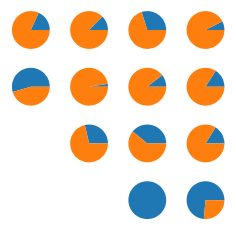

In [108]:
depict_som(df, x_dim=4, y_dim=4)

In [111]:
my_cell = df.query("X==1 and Y==3")

In [112]:
my_cell

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,label,pIC50,X,Y
0,CHEMBL370039,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.067019,1,3
1,CHEMBL3774737,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,8.920819,1,3
3,CHEMBL3775116,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,6.920819,1,3
6,CHEMBL93326,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,7.270835,1,3
11,CHEMBL4165384,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,7.060481,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,CHEMBL4225059,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.648977,1,3
1541,CHEMBL4227881,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,7.229148,1,3
1544,CHEMBL4081807,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,8.251812,1,3
1555,CHEMBL4080172,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,7.214670,1,3


In [82]:
import seaborn as sns


<AxesSubplot:xlabel='X', ylabel='Y'>

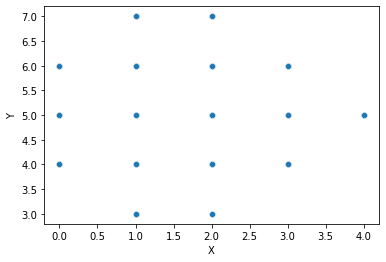

In [89]:
sns.scatterplot(x=df["X"],y=df["Y"])

In [88]:
df["Y"].isna().sum()

0

In [114]:
som.winner(df.iloc[0])

ValueError: operands could not be broadcast together with shapes (886,) (4,4,881) 